# Compressible problem: Inviscid Wedge

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pyvista as pv
import cfdtoolbox.su2.fields as su
import environment as _

pv.set_jupyter_backend('static')
pv.start_xvfb()

In [3]:
!cd meshes && gmsh mesh_wedge_inv.cgns -2 -format su2

Info    : Running '/usr/local/bin/gmsh mesh_wedge_inv.cgns -2 -format su2' [Gmsh 4.9.1, 1 node, max. 1 thread]
Info    : Started on Mon Dec 20 23:35:48 2021
Info    : Reading 'mesh_wedge_inv.cgns'...
Info    : Length unit in CGNS file not defined, therefore not rescaling
Info    : Done reading 'mesh_wedge_inv.cgns'
Info    : Meshing 1D...
Info    : Done meshing 1D (Wall 1.5935e-05s, CPU 9e-06s)
Info    : Meshing 2D...
Info    : Done meshing 2D (Wall 4.0715e-05s, CPU 1.9e-05s)
Info    : 3750 nodes 3872 elements
Info    : Writing 'mesh_wedge_inv.su2'...
Info    : Writing 3626 elements and 3750 nodes
Info    : Done writing 'mesh_wedge_inv.su2'
Info    : Stopped on Mon Dec 20 23:35:48 2021 (From start: Wall 0.00818532s, CPU 0.467822s)


In [4]:
case_dir = "cases/su2-02-compressible-inviscid-wedge"
case_mesh = "meshes/mesh_wedge_inv.cgns"
case_view = "meshes/mesh_wedge_inv.su2"

## Case construction

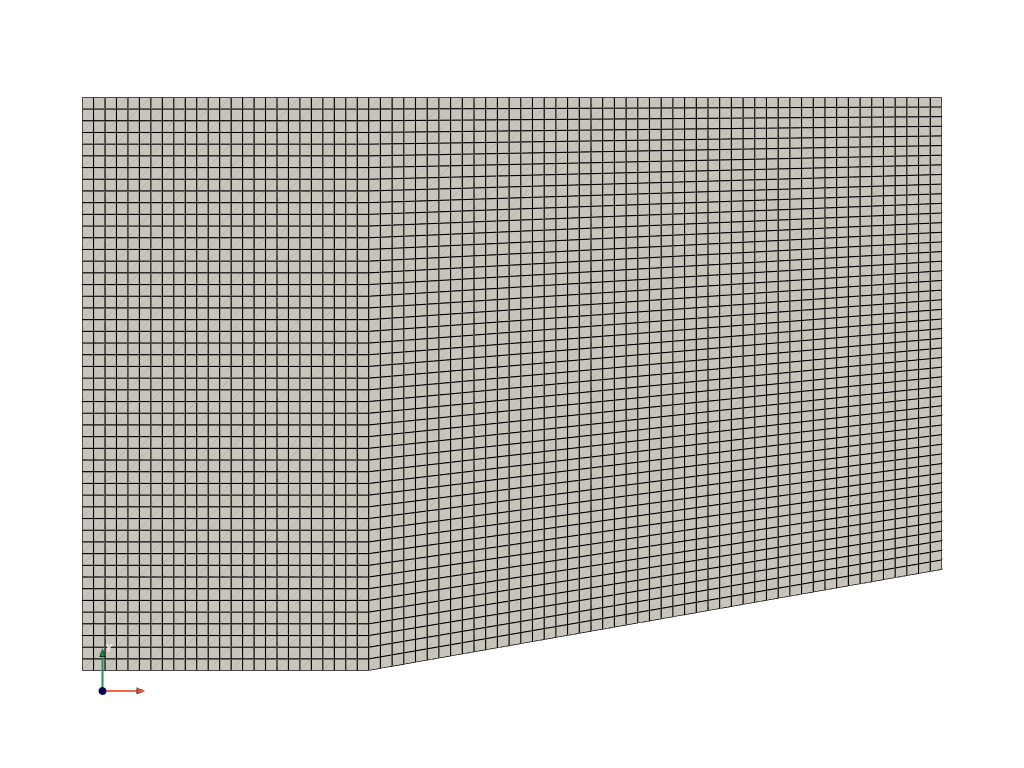

In [5]:
cpos = ((0.75, 0.5, 2.5),
        (0.75, 0.5, 0.0),
        (0.00, 0.0, 0.0))

grid = pv.read(case_view)
grid.plot(cpos=cpos, show_edges=True, color="w", background="w")

In [6]:
set(grid.cell_data["su2:tag"])

{0}

In [7]:
su.problem.SOLVER.value = "EULER"

su.problem.MATH_PROBLEM.value = "DIRECT"

su.problem.RESTART_SOL.value = "NO"

In [8]:
su.compressible.MACH_NUMBER.value = 2.0

su.compressible.AOA.value = 0.0

su.compressible.SIDESLIP_ANGLE.value = 0.0

su.compressible.FREESTREAM_PRESSURE.value = 100000.0

su.compressible.FREESTREAM_TEMPERATURE.value = 300.0

In [9]:
su.reference_value.REF_ORIGIN_MOMENT_X.value = 0.25

su.reference_value.REF_ORIGIN_MOMENT_Y.value = 0.00

su.reference_value.REF_ORIGIN_MOMENT_Z.value = 0.00

su.reference_value.REF_LENGTH.value = 1.0

su.reference_value.REF_AREA.value = 1.0

In [10]:
su.boundary_condition.MARKER_EULER.value = ("upper", "lower")

inlet = ("inlet", 300.0, 100000.0, 695.4290761824674, 0.0, 0.0)
su.boundary_condition.MARKER_SUPERSONIC_INLET.value = inlet

su.boundary_condition.MARKER_OUTLET.value = ("outlet", 10000.0)

su.surfaces.MARKER_PLOTTING.value = ("lower")

su.surfaces.MARKER_MONITORING.value = ("upper", "lower")

In [11]:
su.common.NUM_METHOD_GRAD.value = "WEIGHTED_LEAST_SQUARES"

su.common.CFL_NUMBER.value = 5.0

su.common.CFL_ADAPT.value = "NO"

# CFL_ADAPT_PARAM= ( 0.1, 2.0, 5.0, 1e10 )

# RK_ALPHA_COEFF= ( 0.66667, 0.66667, 1.000000 )

su.solver_control.ITER.value = 10000

su.linear_solver.LINEAR_SOLVER.value = "FGMRES"

su.linear_solver.LINEAR_SOLVER_PREC.value = "ILU"

su.linear_solver.LINEAR_SOLVER_ERROR.value = 1.0E-06

su.linear_solver.LINEAR_SOLVER_ITER.value = 20

In [12]:
su.multigrid.MGLEVEL.value = 3

su.multigrid.MGCYCLE.value = "W_CYCLE"

su.multigrid.MG_PRE_SMOOTH.value = (1, 2, 3, 3)

su.multigrid.MG_POST_SMOOTH.value = (0, 0, 0, 0)

su.multigrid.MG_CORRECTION_SMOOTH.value = (0, 0, 0, 0)

su.multigrid.MG_DAMP_RESTRICTION.value = 1.0

su.multigrid.MG_DAMP_PROLONGATION.value = 1.0

In [13]:
su.flow_numerical.TIME_DISCRE_FLOW.value = "EULER_IMPLICIT"

su.flow_numerical.CONV_NUM_METHOD_FLOW.value = "HLLC"

su.limiter.MUSCL_FLOW.value = "YES"

su.limiter.SLOPE_LIMITER_FLOW.value = "NONE"

su.limiter.VENKAT_LIMITER_COEFF.value = 0.006

# JST_SENSOR_COEFF= ( 0.5, 0.02 )

In [14]:
su.solver_control.CONV_FIELD.value = "RMS_DENSITY"

su.solver_control.CONV_RESIDUAL_MINVAL.value = -13

su.solver_control.CONV_STARTITER.value = 10

su.solver_control.CONV_CAUCHY_ELEMS.value = 100

su.solver_control.CONV_CAUCHY_EPS.value = 1.0E-10

In [15]:
su.file_io.MESH_FILENAME.value = case_mesh

su.file_io.MESH_FORMAT.value = "CGNS"

su.file_io.TABULAR_FORMAT.value = "CSV"

stdout = ("INNER_ITER", "WALL_TIME", "RMS_DENSITY",
          "RMS_ENERGY", "LIFT", "DRAG")
su.SCREEN_OUTPUT.value = stdout

In [16]:
su.design.DV_KIND.value = "SCALE_GRID"

su.design.DV_PARAM.value = ( 1.0 )

su.design.DV_VALUE.value = 10.0

In [17]:
su.SU2ConfigField.case.dump_case(case_dir)

In [18]:
!cd cases/su2-02-compressible-inviscid-wedge/ && SU2_CFD -d config.cfg > dryrun.log

In [19]:
%%time
su.SU2ConfigField.case.run_command(case_dir, "SU2_CFD config.cfg")

CPU times: user 0 ns, sys: 5.67 ms, total: 5.67 ms
Wall time: 2.95 s


In [20]:
grid = pv.read(f"{case_dir}/vol_solution.vtu")

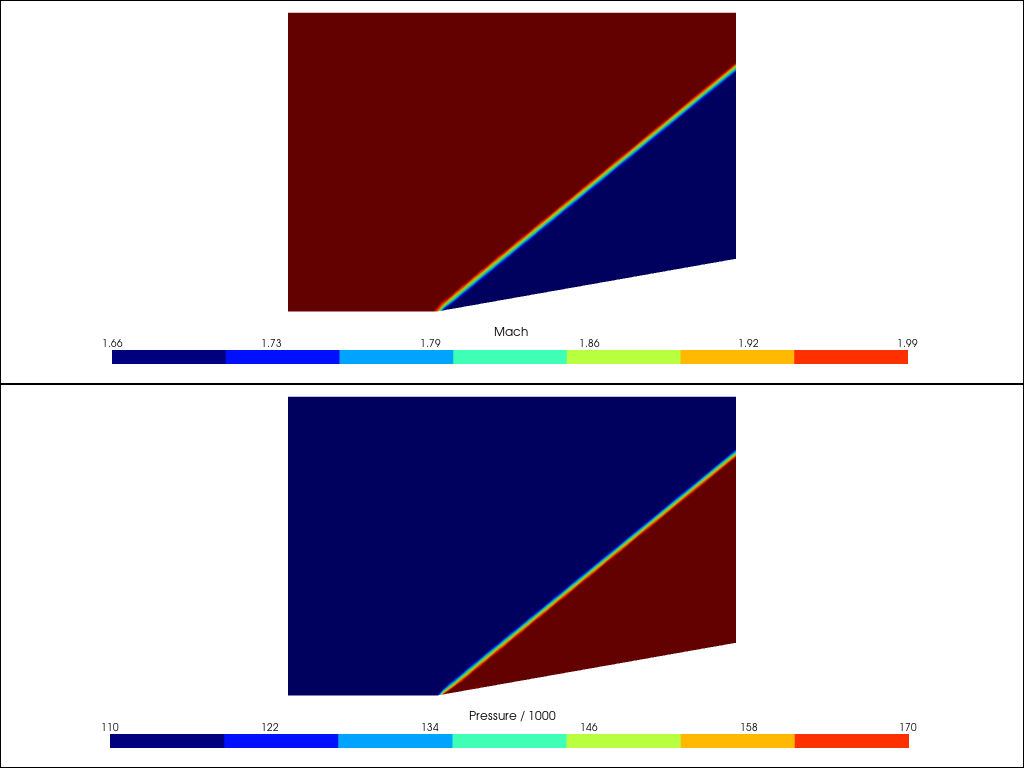

In [21]:
cpos = ((0.75, 0.4, 2.4),
        (0.75, 0.4, 0.0),
        (0.00, 0.0, 0.0))

opts = dict(
    cmap="jet",
    pbr=False,
    scalar_bar_args=dict(
        height=0.1,
        width=0.8, 
        vertical=False, 
        position_x=0.1,
        position_y=0.05,
        color="k",
        n_colors=7,
        n_labels=6
    )
)

p = pv.Plotter(shape="1/1", notebook=True)
p.set_background(color="w")

lims = (110, 170)
opts["scalar_bar_args"]["fmt"] = "%.0f"
opts["scalar_bar_args"]["title"] = "Pressure / 1000"
pressure = grid["Pressure"] / 1000

p.subplot(0)
p.add_mesh(grid.copy(), **opts, scalars=pressure, clim=lims)

lims = (1.66, 1.99)
opts["scalar_bar_args"]["fmt"] = "%.2f"
opts["scalar_bar_args"]["title"] = "Mach"

p.subplot(1)
p.add_mesh(grid.copy(), **opts, scalars="Mach", clim=lims)

p.link_views()
p.show(cpos=cpos)

Now you can check these results against the [reference](https://su2code.github.io/tutorials/Inviscid_Wedge/).

Hope you have enjoyed, see you next time!